<a href="https://colab.research.google.com/github/baalasangar/MLAI/blob/master/13_Capstone/ObjectDetection_autogluon_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pydicom

!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0"
!pip install autogluon

In [2]:
import pandas as pd 
import numpy as np
import os
import pydicom as dicom
import cv2
import shutil

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

import autogluon.core as ag
from autogluon.vision import ObjectDetector



/usr/local/lib/python3.7/dist-packages/gluoncv/__init__.py:40: UserWarning: Both `mxnet==1.8.0` and `torch==1.9.0+cu102` are installed. You might encounter increased GPU memory footprint if both framework are used at the same time.
  warnings.warn(f'Both `mxnet=={mx.__version__}` and `torch=={torch.__version__}` are installed. '


In [3]:
# DATA_ROOT_PATH = "/content/drive/MyDrive/GreatLearning/Captone_project/Pneumonia _DS/"
# META_DATA = os.path.join(DATA_ROOT_PATH,"stage_2_detailed_class_info.csv/stage_2_detailed_class_info.csv")
# TRAIN_LABEL = os.path.join(DATA_ROOT_PATH,"stage_2_train_labels.csv/stage_2_train_labels.csv")
# TRAIN_FOLDER = os.path.join(DATA_ROOT_PATH,"stage_2_train_images")
# TEST_FOLDER = os.path.join(DATA_ROOT_PATH,"stage_2_test_images")

# AUTOGLUON_PATH = "/content/drive/MyDrive/GreatLearning/Captone_project/Code/Baala/autogluon"

# DATA_ROOT_PATH,META_DATA, TRAIN_LABEL,TRAIN_FOLDER,TEST_FOLDER

# infected_pd = train_data.query("Target == 1").sample(n=9,random_state = 32)
# # train_data.fillna(value =0,inplace = True)

# # for index, row in infected_pd.iterrows():
# #   print(row["filepath"])
# #   ds = dicom.dcmread(row["filepath"])
# #   cv2.imwrite(os.path.join(AUTOGLUON_PATH, "{}.jpg".format(row["patientId"])), ds.pixel_array)
# #   textfile = "{}.txt".format(row["patientId"])
# #   outfile = open(os.path.join(AUTOGLUON_PATH,textfile), 'w') 
# #   outfile.write("{} {} {} {} {}\n".format(row["Target"],row["x"],row["y"],row["width"],row["height"])) 
# #   outfile.close()


In [4]:
IMG_SOURCE_PATH = "/content/drive/MyDrive/GreatLearning/Captone_project/Pneumonia _DS/Working/images/"
LABEL_SOURCE_PATH = "/content/drive/MyDrive/GreatLearning/Captone_project/Pneumonia _DS/Working/labels/"
AUTOGLUON_PATH = "/content/drive/MyDrive/GreatLearning/Captone_project/Code/Baala/autogluon"

In [5]:
train_data = pd.read_csv("/content/drive/MyDrive/GreatLearning/Captone_project/Code/Baala/final_data.csv")
train_data.head()

,Unnamed: 0,patientId,x,y,width,height,Target,class,filepath,Train_or_Test,area,age,sex,ViewPosition,BodyPartExamined
0,0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,/content/drive/MyDrive/GreatLearning/Captone_p...,Train,NaN,51,F,PA,CHEST
1,1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,/content/drive/MyDrive/GreatLearning/Captone_p...,Train,NaN,48,F,PA,CHEST
2,2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,/content/drive/MyDrive/GreatLearning/Captone_p...,Train,NaN,19,M,AP,CHEST
3,3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,Normal,/content/drive/MyDrive/GreatLearning/Captone_p...,Train,NaN,28,M,PA,CHEST
4,4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,Lung Opacity,/content/drive/MyDrive/GreatLearning/Captone_p...,Train,80727.0,32,F,AP,CHEST


In [6]:
# infected_pd = train_data.query("Target == 1").sample(n=300,random_state = 32)["patientId"]
# for id in list(infected_pd):
#   img_name = "{}.{}".format(id,"jpg")
#   txt_name = "{}.{}".format(id,"txt")
#   shutil.copyfile(os.path.join(IMG_SOURCE_PATH,img_name),os.path.join(AUTOGLUON_PATH,"affected",img_name))
#   shutil.copyfile(os.path.join(LABEL_SOURCE_PATH,txt_name),os.path.join(AUTOGLUON_PATH,"affected",txt_name))

In [7]:
# shutil.make_archive(os.path.join(AUTOGLUON_PATH,"affected"),"zip",os.path.join(AUTOGLUON_PATH,"affected"))

In [8]:
# shutil.unpack_archive(os.path.join(AUTOGLUON_PATH,"autogluon.zip"), AUTOGLUON_PATH)


In [9]:
# not_infected_pd = train_data.query("Target == 0").sample(n=100,random_state = 32)["patientId"]
# for id in list(infected_pd):
#   img_name = "{}.{}".format(id,"jpg")
#   txt_name = "{}.{}".format(id,"txt")
#   shutil.copyfile(os.path.join(IMG_SOURCE_PATH,img_name),os.path.join(AUTOGLUON_PATH,"not_affected",img_name))


In [10]:
dataset_train = ObjectDetector.Dataset.from_voc("/content/drive/MyDrive/GreatLearning/Captone_project/Code/Baala/autogluon/pheno_VOC", splits='train')
dataset_train.head()

,image,rois,image_attr
0,/content/drive/MyDrive/GreatLearning/Captone_p...,"[{'class': '0', 'xmin': 0.1796875, 'ymin': 0.1...","{'width': 128.0, 'height': 128.0}"
1,/content/drive/MyDrive/GreatLearning/Captone_p...,"[{'class': '0', 'xmin': 0.1328125, 'ymin': 0.1...","{'width': 128.0, 'height': 128.0}"
2,/content/drive/MyDrive/GreatLearning/Captone_p...,"[{'class': '0', 'xmin': 0.3046875, 'ymin': 0.2...","{'width': 128.0, 'height': 128.0}"
3,/content/drive/MyDrive/GreatLearning/Captone_p...,"[{'class': '0', 'xmin': 0.46875, 'ymin': 0.320...","{'width': 128.0, 'height': 128.0}"
4,/content/drive/MyDrive/GreatLearning/Captone_p...,"[{'class': '0', 'xmin': 0.5546875, 'ymin': 0.3...","{'width': 128.0, 'height': 128.0}"


In [15]:
dataset_test = ObjectDetector.Dataset.from_voc("/content/drive/MyDrive/GreatLearning/Captone_project/Code/Baala/autogluon/pheno_VOC", splits='test')
dataset_test.head()

,image,rois,image_attr
0,/content/drive/MyDrive/GreatLearning/Captone_p...,"[{'class': '0', 'xmin': 0.6015625, 'ymin': 0.4...","{'width': 128.0, 'height': 128.0}"
1,/content/drive/MyDrive/GreatLearning/Captone_p...,"[{'class': '0', 'xmin': 0.5703125, 'ymin': 0.3...","{'width': 128.0, 'height': 128.0}"
2,/content/drive/MyDrive/GreatLearning/Captone_p...,"[{'class': '0', 'xmin': 0.234375, 'ymin': 0.17...","{'width': 128.0, 'height': 128.0}"
3,/content/drive/MyDrive/GreatLearning/Captone_p...,"[{'class': '0', 'xmin': 0.4921875, 'ymin': 0.3...","{'width': 128.0, 'height': 128.0}"
4,/content/drive/MyDrive/GreatLearning/Captone_p...,"[{'class': '0', 'xmin': 0.6484375, 'ymin': 0.5...","{'width': 128.0, 'height': 128.0}"


Randomly split train_data into train[138]/validation[15] splits.
Starting HPO experiments


  0%|          | 0/32 [00:00<?, ?it/s]

modified configs(<old> != <new>): {
root.ssd.base_network vgg16_atrous != resnet50_v1
root.ssd.data_shape  300 != 512
root.gpus            (0, 1, 2, 3) != (0,)
root.dataset_root    ~/.mxnet/datasets/ != auto
root.valid.batch_size 16 != 8
root.train.seed      233 != 699
root.train.epochs    20 != 50
root.train.early_stop_patience -1 != 10
root.train.early_stop_max_value 1.0 != inf
root.train.batch_size 16 != 8
root.train.early_stop_baseline 0.0 != -inf
root.dataset         voc_tiny != auto
}
Saved config to /content/4cb0cc06/.trial_0/config.yaml
No gpu detected, fallback to cpu. You can ignore this warning if this is intended.
Using transfer learning from ssd_512_resnet50_v1_coco, the other network parameters are ignored.
Model file not found. Downloading.



 98%|█████████▊| 176763/181188 [00:04<00:00, 40275.55KB/s]
181189KB [00:04, 39861.22KB/s]                            
Start training from [Epoch 0]
[Epoch 0] Training cost: 183.250995, CrossEntropy=3.737913, SmoothL1=2.465920
[Epoch 0] Validation: 
0=0.04246711372802759
mAP=0.04246711372802759
[Epoch 0] Current best map: 0.042467 vs previous 0.000000, saved to /content/4cb0cc06/.trial_0/best_checkpoint.pkl
[Epoch 1] Training cost: 185.663242, CrossEntropy=2.620785, SmoothL1=2.261646
[Epoch 1] Validation: 
0=0.09645521877926569
mAP=0.09645521877926569
[Epoch 1] Current best map: 0.096455 vs previous 0.042467, saved to /content/4cb0cc06/.trial_0/best_checkpoint.pkl
[Epoch 2] Training cost: 181.658603, CrossEntropy=2.489973, SmoothL1=2.053932
[Epoch 2] Validation: 
0=0.2282034614064639
mAP=0.2282034614064639
[Epoch 2] Current best map: 0.228203 vs previous 0.096455, saved to /content/4cb0cc06/.trial_0/best_checkpoint.pkl
[Epoch 3] Training cost: 190.305240, CrossEntropy=2.464964, SmoothL


100%|██████████| 57421/57421 [00:01<00:00, 42128.17KB/s]
modified configs(<old> != <new>): {
root.ssd.base_network vgg16_atrous != resnet50_v1
root.ssd.data_shape  300 != 512
root.gpus            (0, 1, 2, 3) != (0,)
root.dataset_root    ~/.mxnet/datasets/ != auto
root.valid.batch_size 16 != 8
root.train.seed      233 != 699
root.train.epochs    20 != 50
root.train.early_stop_patience -1 != 10
root.train.early_stop_max_value 1.0 != inf
root.train.batch_size 16 != 8
root.train.early_stop_baseline 0.0 != -inf
root.dataset         voc_tiny != auto
}
Saved config to /content/4cb0cc06/.trial_1/config.yaml
No gpu detected, fallback to cpu. You can ignore this warning if this is intended.
Using transfer learning from ssd_512_resnet50_v1_coco, the other network parameters are ignored.
Start training from [Epoch 0]
[Epoch 0] Training cost: 178.379009, CrossEntropy=3.969733, SmoothL1=2.587346
[Epoch 0] Validation: 
0=0.0042322663094975545
mAP=0.0042322663094975545
[Epoch 0] Current best map: 0.

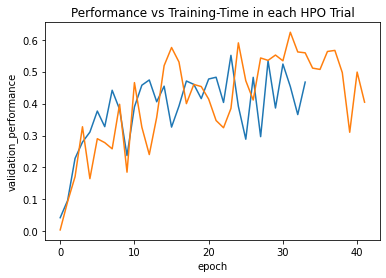

Finished, total runtime is 14413.93 s
{ 'best_config': { 'dataset': 'auto',
                   'dataset_root': 'auto',
                   'estimator': <class 'gluoncv.auto.estimators.ssd.ssd.SSDEstimator'>,
                   'gpus': [0],
                   'horovod': False,
                   'num_workers': 4,
                   'resume': '',
                   'save_interval': 1,
                   'ssd': { 'amp': False,
                            'base_network': 'resnet50_v1',
                            'data_shape': 512,
                            'filters': None,
                            'nms_thresh': 0.45,
                            'nms_topk': 400,
                            'ratios': ( [1, 2, 0.5],
                                        [1, 2, 0.5, 3, 0.3333333333333333],
                                        [1, 2, 0.5, 3, 0.3333333333333333],
                                        [1, 2, 0.5, 3, 0.3333333333333333],
                                        [1, 2, 0

mAP on test dataset: 0.006269245543351095


NumExpr defaulting to 4 threads.


Prediction result:    predict_class  ...                                       predict_rois
0              0  ...  {'xmin': 0.00841069221496582, 'ymin': 0.008104...
1              0  ...  {'xmin': 0.03441748023033142, 'ymin': 0.419800...
2              0  ...  {'xmin': 0.5818106532096863, 'ymin': 0.1734932...
3              0  ...  {'xmin': 0.24173709750175476, 'ymin': 0.110625...
4              0  ...  {'xmin': 0.9427630305290222, 'ymin': 0.4918801...
..           ...  ...                                                ...
95             0  ...  {'xmin': 0.14631563425064087, 'ymin': 0.384174...
96             0  ...  {'xmin': 0.0, 'ymin': 0.0, 'xmax': 0.109418764...
97             0  ...  {'xmin': 0.2642166018486023, 'ymin': 0.7943788...
98             0  ...  {'xmin': 0.6698804497718811, 'ymin': 0.5411741...
99             0  ...  {'xmin': 0.06821712106466293, 'ymin': 0.968155...

[100 rows x 3 columns]


In [16]:
time_limit = 4*3600 # 4 hours

hyperparameters= { 
    'transfer': ag.Categorical('ssd_512_resnet50_v1_coco',
                                                'yolo3_darknet53_coco',
                                                'center_net_resnet50_v1b_coco'),
                        'learning_rate': ag.Real(1e-4, 1e-2, log=True),
                        'batch_size': ag.Categorical(8, 16, 32, 64),
                        'epochs': 50,
                        'early_stop_patience': 10
                        }
hyperparameter_tune_kwargs =  {
                        'num_trials': 32,
                        'searcher': 'random',
                    }                       

detector = ObjectDetector()
detector.fit(dataset_train,
             hyperparameters=hyperparameters,
             time_limit=time_limit,
             hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
             ngpus_per_trial=1)


test_map = detector.evaluate(dataset_test)
print("mAP on test dataset: {}".format(test_map[1][1]))

# visualization
result = detector.predict(dataset_test.iloc[0]['image'])
print('Prediction result:', result)


In [1]:
savefile = '/content/drive/MyDrive/GreatLearning/Captone_project/Code/Baala/model/detector_autog.pkl'
detector.save(savefile)
new_detector = ObjectDetector.load(savefile)

result = new_detector.predict(dataset_test.iloc[0]['image'])
print('Prediction result:', result)

NameError: ignored

In [18]:
# imgcv = cv2.imread(dataset_train.iloc[0]["image"])

# cv2.rectangle(imgcv, (int(0.2403846153846154 * 416),
#                       int(0.6995192307692307*416)), 
#               (int(0.4110576923076923*416), int(0.7740384615384616*416)), (255,0,0), 2)

# cv2.rectangle(imgcv, (int(0.10230743885040283 * 416),
#                       int(0*416)), 
#               (int(0.8006809949874878*416), int(1*416)), (255,0,255), 2)
# plt.imshow(imgcv,"bone") 
# plt.show()
